# Traffic Sign Classification

Let's build and train a deep neural network to classify traffic signs, using TensorFlow. Let's performed image pre-processing and validation to guard against overfitting.

Check the [write up template](https://github.com/rzuccolo/rz-carnd-traffic-sign/blob/master/writeup_traffic-sign.md) before navigate the code to get good insights about this project and get mportant reference such as dataset download.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Basic Summary of the Data Set

In [2]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

Visualizing the German Traffic Signs Dataset using the pickled file(s). Plotting traffic sign images, plotting the count of each sign, etc.


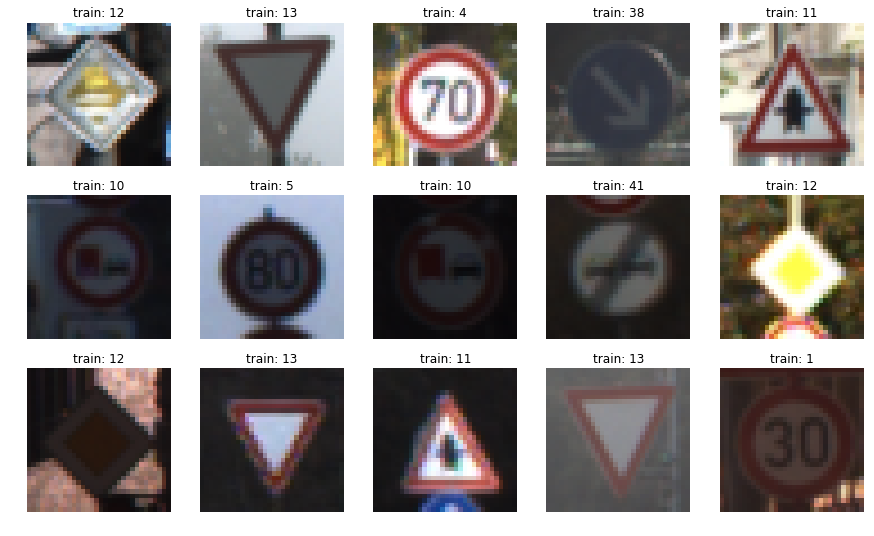

In [3]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#  Plotting traffic sign images
def plotsignal(images, labels, nrows=1, ncols=1, cmap=None, prefix_label = 'label:'):
    """
    Plot images in a subplot arrangement.
    images = 4D array containing raw pixel data of the images, (num examples, width, height, channels)
    labels = 1D array containing the label/class id of the image
    nrows = numbers of rows in the image plot arrangement
    ncols = numbers of columns in the image plot arrangement
    prefix_label = prefix label to show on top of images
    """
    scalesize = 3*nrows*ncols
    f, axarr = plt.subplots(nrows, ncols, figsize=(scalesize/nrows, scalesize/ncols))
    if (nrows != 1) and (ncols != 1): # Take care of error in case nrows/ncols = 1
        axarr = axarr.ravel()
    if (nrows == 1) and (ncols == 1): # Take care of error in case both nrows/ncols = 1
        index = np.random.randint(0, len(images))
        image = images[index].squeeze()
        axarr.axis('off')
        axarr.imshow(image, cmap=cmap)
        axarr.set_title(prefix_label + ' ' + labels[index])
    else:
        for i in range(nrows*ncols):
            index = np.random.randint(0, len(images))
            image = images[index].squeeze()
            axarr[i].axis('off')
            axarr[i].imshow(image, cmap=cmap)
            axarr[i].set_title(prefix_label + ' ' + str(labels[index]))

nrows = 3 # change it here the way you want, 0 will give error
ncols = 5 # change it here the way you want, 0 will give error
plotsignal(X_train, y_train, nrows, ncols, cmap=None, prefix_label = 'train:')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


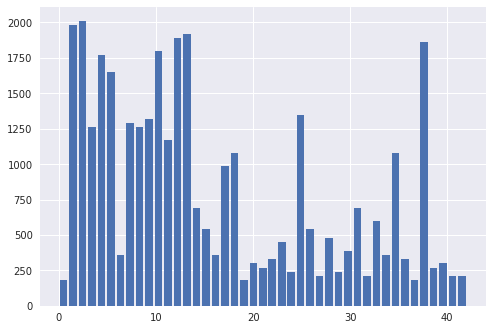

In [4]:
# Enlarge Inline Pictures
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = "14, 8" # or  whatever you want

# Plotting the count of each sign
import seaborn as sns
n, bins, patches = plt.hist(y_train, bins=n_classes, rwidth=0.8)

----

## Step 2: Desig and Test Model Architecture

Designing and implementing a deep learning model that learns to recognize traffic signs. Trainning and testing the model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider here:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.


### Pre-process the Data Set (normalization, grayscale, etc.)

Train RGB shape: (34799, 32, 32, 3)
Train Grayscale shape: (34799, 32, 32, 1)
Validation RGB shape: (4410, 32, 32, 3)
Validation Grayscale shape: (4410, 32, 32, 1)
Test RGB shape: (12630, 32, 32, 3)
Test Grayscale shape: (12630, 32, 32, 1)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


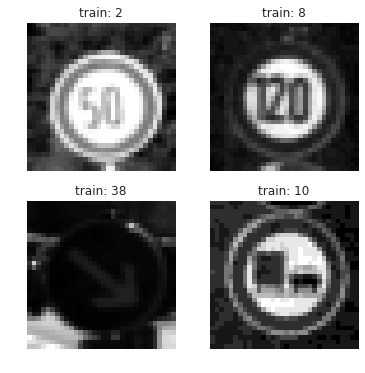

In [5]:
# rgb to grayscale
# recommended by Pierre Sermanet and Yann LeCun paper
# http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
# "Experiments conducted after phase 1 produced a new record of 99.17% by increasing the network capacity,
# and by using greyscale images instead of color"
import cv2
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def grayscalebatch(images):
    """
    Convert the whole batch of features images to grayscale and keep depth of 3 channels.
    images = 4D array containing raw pixel data of the images, (num examples, width, height, channels)    
    """
    # Initialize grayscale 4D outputs
    #images_gray = np.zeros_like(images) # to return 3 channels
    images_gray = np.zeros([len(images),images[0].shape[0], images[0].shape[1], 1]) # to return 1 channels
    
    # Initialize grayscale temporary 3D variables
    gray = np.zeros([len(images),images[0].shape[0], images[0].shape[1]])

    # Loop on each image
    for i in range(len(images)):
        gray[i] = grayscale(images[i]) 

    # Copy same grayscale image on each of 3 channels
    #images_gray[:,:,:,0] = gray # to return 3 channels
    #images_gray[:,:,:,1] = gray # to return 3 channels
    #images_gray[:,:,:,2] = gray # to return 3 channels
    images_gray[:,:,:,0] = gray # to return 1 channels
    
    
    return images_gray
        
    
# Convert images to grayscale 4D outputs
X_train_rgb = X_train.copy()
X_validation_rgb = X_validation.copy()
X_test_rgb = X_test.copy()

X_train_gray = grayscalebatch(X_train_rgb)
X_validation_gray = grayscalebatch(X_validation_rgb)
X_test_gray = grayscalebatch(X_test_rgb)

# Check shapes
print('Train RGB shape:', X_train_rgb.shape)
print('Train Grayscale shape:', X_train_gray.shape)
print('Validation RGB shape:', X_validation_rgb.shape)
print('Validation Grayscale shape:', X_validation_gray.shape)
print('Test RGB shape:', X_test_rgb.shape)
print('Test Grayscale shape:', X_test_gray.shape)

# Check images
nrows = 2 # change it here the way you want, 0 will give error
ncols = 2 # change it here the way you want, 0 will give error
plotsignal(X_train_gray, y_train, nrows, ncols, cmap='gray', prefix_label = 'train:')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


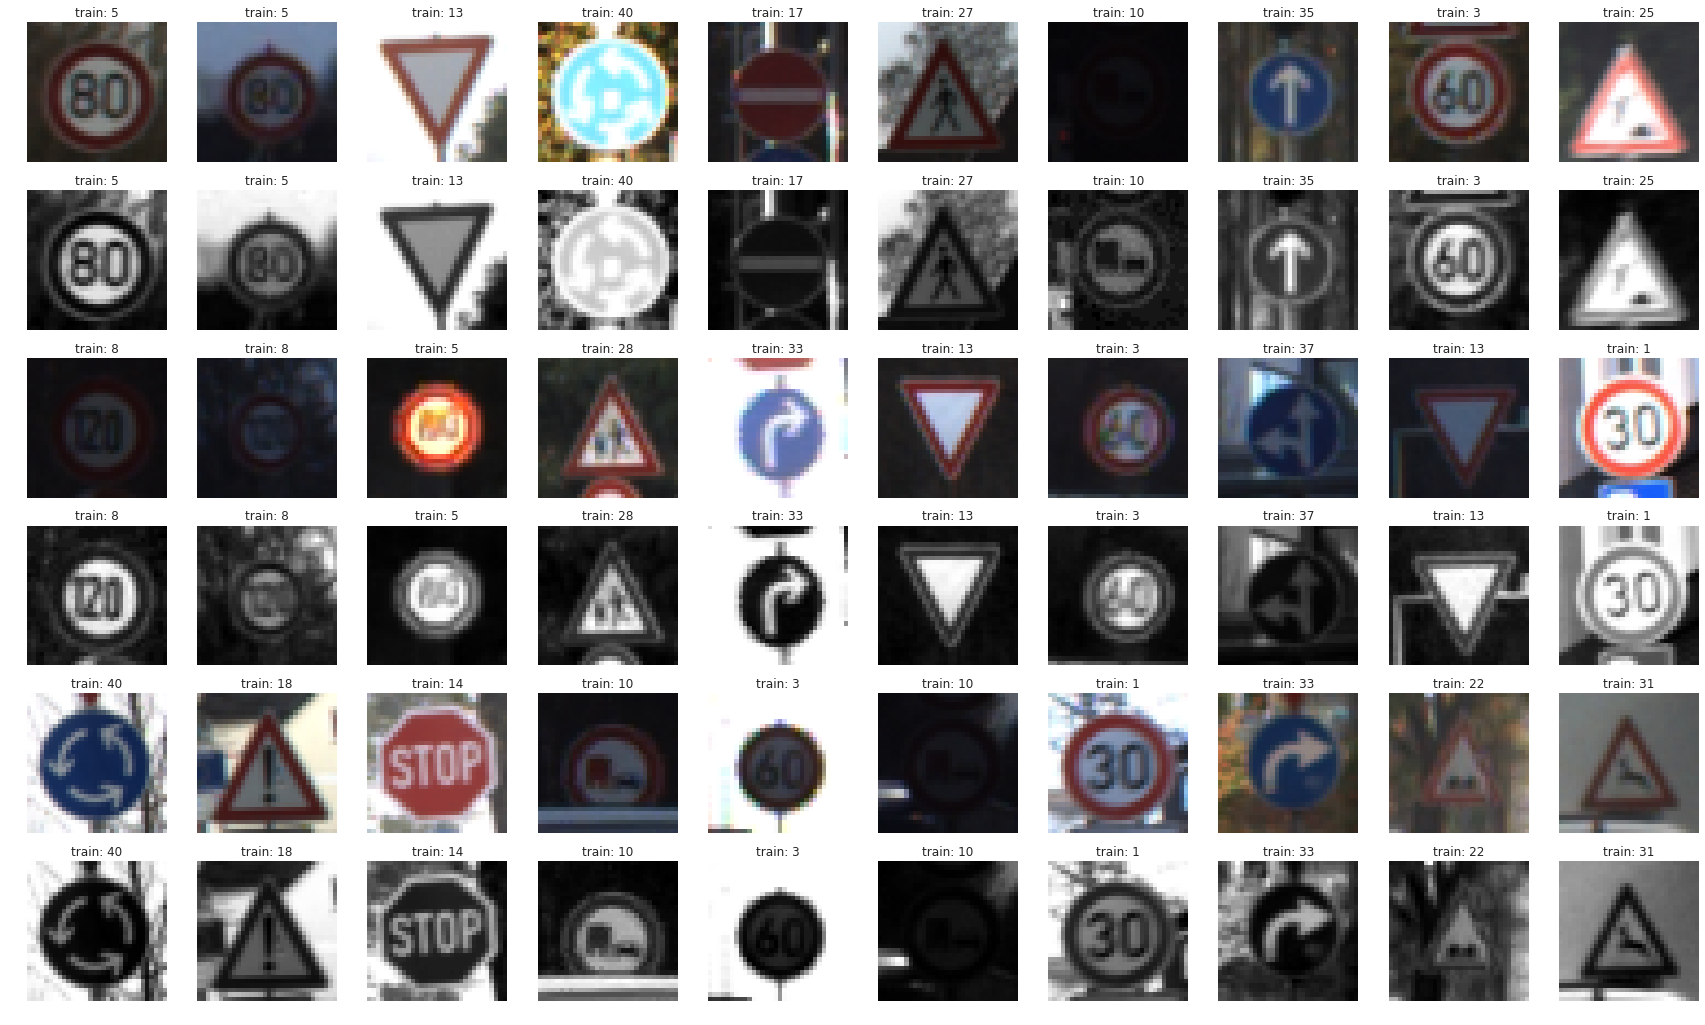

In [6]:
# Visualize rgb vs grayscale
def rgb_vs_gray_plotsignal(images, images_gray, labels, nrows=1, ncols=1, prefix_label = 'label:'):
    """
    Plot images in a subplot arrangement.
    images = 4D array containing raw pixel data of the images, (num examples, width, height, channels)
    images_gray = 4D array containing raw pixel data of the images in grayscale, (num examples, width, height, channels)
    labels = 1D array containing the label/class id of the image
    nrows = numbers of rows in the image plot arrangement
    ncols = numbers of columns in the image plot arrangement
    prefix_label = prefix label to show on top of images
    """

    scalesize = 3*nrows*2*ncols    
    f, axarr = plt.subplots(nrows*2, ncols, figsize=(scalesize/(2*nrows), scalesize/ncols))    
    axarr = axarr.ravel()
    for j in range(1,nrows+1):
        for i in range(ncols): 
            index = np.random.randint(0, len(images))
            image = images[index].squeeze()
            k = i + 2*ncols*(j-1)
            axarr[k].axis('off')
            axarr[k].imshow(image)
            axarr[k].set_title(prefix_label + ' ' + str(labels[index]))
            
            image = images_gray[index].squeeze()
            k = i + 2*ncols*(j-1) + ncols
            axarr[k].axis('off')
            axarr[k].imshow(image, cmap='gray')
            axarr[k].set_title(prefix_label + ' ' + str(labels[index]))
    
nrows = 3 # change it here the way you want, 0 will give error
ncols = 10 # change it here the way you want, 0 will give error
rgb_vs_gray_plotsignal(X_train_rgb, X_train_gray, y_train, nrows, ncols, prefix_label = 'train:')

In [7]:
# Finalize grayscale convertion
X_train = X_train_gray
X_validation = X_validation_gray
X_test = X_test_gray

In [8]:
# Checking the sequence/order of the images by id
print('Sequence of images by id:\n', y_train[0:300], '\n')

# Check mean and std of data
print('train: mean, std ', np.mean(X_train), np.std(X_train))
print('validation: mean, std ', np.mean(X_validation), np.std(X_validation))
print('test: mean, std ', np.mean(X_test), np.std(X_test))

Sequence of images by id:
 [41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31] 

train: mean, std  81.9172385241 66.1343973937
validation: 

In [9]:
# Normalization

# Before normalize
print('Before Normalization:')
print(np.min(X_train), np.mean(X_train), np.max(X_train))
print(np.min(X_validation), np.mean(X_validation), np.max(X_validation))
print(np.min(X_test), np.mean(X_test), np.max(X_test))

# Normalizing on interval of [0,1]
X_train = X_train / 255.
X_validation = X_validation / 255.
X_test = X_test / 255.
print('[0,1] by 255:')
print(np.min(X_train), np.mean(X_train), np.max(X_train))
print(np.min(X_validation), np.mean(X_validation), np.max(X_validation))
print(np.min(X_test), np.mean(X_test), np.max(X_test))


Before Normalization:
3.0 81.9172385241 255.0
5.0 82.7533863024 255.0
4.0 81.2774837008 255.0
[0,1] by 255:
0.0117647058824 0.321244072643 1.0
0.0196078431373 0.324523083539 1.0
0.0156862745098 0.318735230199 1.0


In [10]:
# Initial shuffle the training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Checking the sequence/order of the images by id
print('Sequence of images by id:\n', y_train[0:300], '\n')

Sequence of images by id:
 [16 10  9  2 38  1 22 35  4 16  2  2  4  2 18  2  6  7 13  6 38 38 39 13 12
 26 22 12  9 38 28 17 25 40 13  4 26 25 35 23  4 35  2  1 29 12  8 10 18  6
  1 25 17  5 35  5 10 31  1 30 12 10 35  5 12  2  1 11 38 19 13 13  5  2 33
  4 13 10 13  3 13  4 18  4 18 12 38 35  7 12  3  7 12 14  1 35 10 14 42 14
  1  0 13 25  2 24 13 38  8  5 13 23  7  7  4  5  3  4 13 35 33  1  5 16  7
 11 38 13 12 12  8  4  1 31  4 38  7 42 40  7 10 10  8 10  9  2  3  5  4 31
  2 11 11 25  8 24  4  2 17 31 16  3  2  5 17 12 25 14 12 18 18 23  1 17  5
  0  5  2 25  8 23  2  4 30 12  5  8  4  1 18  2 10  1  9  2 11 17  9 16 24
  3 10 36 30 12  5  4 18  4 38 18  0  8 17 13 25  2 17 31 11  3  2 38 23 23
  7  1 34  1 38  4  1  1 14  5 38  3 18 25  2  1  4 12  8 26 12  5 17 10 42
  3 10  1  9 21 33 16 25  9  1 38 38 38 13 23 38 35  7 40  2 35 26 38  8 12
  2  3 14  1 13 18  3 32 35 12 26 21 22 34  0 12  4  5  5  4 14  9  9 10 20] 



### Model Architecture

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Helpers functions

# Convolution + relu
def conv2d(x, W, b, strides=1, padding='VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1],
                     padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

# Max Pool
def maxpool2d(x, k=2, padding='VALID'):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1],
                         strides=[1, k, k, 1],
                         padding=padding)

# Fully connected relu
def fc_relu(x, W, b):
    x = tf.add(tf.matmul(x, W), b)
    return tf.nn.relu(x)


In [12]:
# Network Parameters

# Depths
# 'ini' = Initial numbers of channels
# 'trans' = Spatial transformer localization network depth
# 'cx' = convolution depth output
# 'out' = classifier output depth
depth = {
    'ini': 1,
    'trans': 15,
    'c1': 24,
    'c2': 48,
    'c3': 1200,
    'out': 43
}

# Weights & Biases
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
# mu = mean
# sigma = std deviation
mu = 0
sigma = 0.1
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5,5,depth['ini'],depth['c1']), mean = mu, stddev = sigma), name='wc1'),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5,5,depth['c1'],depth['c2']), mean = mu, stddev = sigma), name='wc2'),
    'wc3': tf.Variable(tf.truncated_normal(shape=(5,5,depth['c2'],depth['c3']), mean = mu, stddev = sigma), name='wc3'),
    'out': tf.Variable(tf.truncated_normal(shape=(5*5*depth['c2']+depth['c3'],depth['out']), mean = mu, stddev = sigma), name='wout')
}

biases = {
    'bc1': tf.Variable(tf.zeros(depth['c1']), name='bc1'),
    'bc2': tf.Variable(tf.zeros(depth['c2']), name='bc2'),
    'bc3': tf.Variable(tf.zeros(depth['c3']), name='bc3'),
    'out': tf.Variable(tf.zeros(depth['out']), name='bout')
}



In [13]:
# Spatial Transformer
# References:

# Spatial Transformer Networks, Google DeepMind, London, UK
# https://arxiv.org/pdf/1506.02025.pdf
# https://www.youtube.com/watch?v=6NOQC_fl1hQ
# https://www.youtube.com/watch?v=T5k0GnBmZVI
# "...We show that the use of spatial transformers results in models which
# learn invariance to translation, scale, rotation and more generic warping, resulting
# in state-of-the-art performance on several benchmarks, and for a number of
# classes of transformations..."

# Traffic Sign Classification Using Deep Inception Based Convolutional Networks
# https://arxiv.org/pdf/1511.02992.pdf
# "...obviated the use of handcrafted data augmentation such as
# translation, rotation etc. and allows the network to learn active
# transformation of features map..."

# https://github.com/tensorflow/models/tree/master/transformer
# https://kevinzakka.github.io/2017/01/18/stn-part2/
# https://medium.com/wonks-this-way/spatial-transformer-networks-with-tensorflow-2eaed0374a16#.scypyqnj0


import spatial_transformer as st

# Spatial transformar module
def transformer(x, dimen, depth, nodes=20):
    """
    Spatial transformer module with 2 fully connected (fc) localization layer,
    relu activation and bilinear interpolation
    x = 4D array containing raw pixel data of the images, (num examples, width, height, channels)
    img_dimension = width of image, assumed same as height
    fc_nodes = number of node on 1st fc localisation layer
    """
    # Setup a two-layer localisation network
    # Key idea:
    # Setup the two-layer localisation network to figure out the parameters for an affine transformation of the input.
    # Use identity transformation as starting point.

    # Identity transformation
    initial = np.array([[1., 0, 0], [0, 1., 0]])
    initial = initial.astype('float32')
    initial = initial.flatten()

    # Create variables for fully connected layer for the localisation network    
    mu = 0
    sigma = 0.1
    weights = {
        'wfc1': tf.Variable(tf.truncated_normal(shape=(dimen*dimen*depth,nodes), mean = mu, stddev = sigma), name='wfc_loc1'),
        'wfc2': tf.Variable(tf.truncated_normal(shape=(nodes,6), mean = mu, stddev = sigma), name='wfc_loc2')
    }
    
    biases = {
        'bfc1': tf.Variable(tf.zeros(nodes), name='bfc_loc1'),
        'bfc2': tf.Variable(initial_value=initial, name='bfc_loc2')
    }


    # Define a two layer localisation network
    # Key idea:
    # Use activation function (relu) for first and second local layers.
    # Add regularization technique (dropout) in anticipation for overfitting.

    # First layer
    #x = tf.cast(x, tf.float32)
    x_flat = flatten(x)
    fc_loc1 = fc_relu(x_flat, weights['wfc1'], biases['bfc1'])

    # Dropout for regularization    
    fc_loc1_drop = tf.nn.dropout(fc_loc1, keep_prob)

    # Second layer
    fc_loc2 = fc_relu(fc_loc1_drop, weights['wfc2'], biases['bfc2'])

    #Create a spatial transformer module
    out_size = (dimen, dimen)
    x_transformed = st.transformer(x, fc_loc2, out_size)
    #x_transformed = tf.reshape(x_transformed, [-1, 32, 32, 1] )
    
    return x_transformed

In [14]:
# Inspired on Sermanet paper but applying spatial transformer
def LeNet_ST10(x):     
    
    # Spatial Transformer 1, on input data
    h_trans1 = transformer(x, 32, depth['ini'], nodes=depth['trans'])
    print('h_trans1', h_trans1.get_shape())

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x26.
    # Activation.
    # Pooling. Input = 28x28x24. Output = 14x14x24.
    c1 = conv2d(h_trans1, weights['wc1'], biases['bc1'], padding='VALID')    
    c1_max = maxpool2d(c1, k=2, padding='VALID')
    print('c1_max', c1_max.get_shape())
    
    # Spatial Transformer 2, on intermediate data
    h_trans2 = transformer(c1_max, 14, depth['c1'], nodes=depth['trans'])
    print('h_trans2', h_trans2.get_shape())

    # Layer 2: Convolutional. Input = 14x14x24 Output = 10x10x48.    
    # Activation.
    # Pooling. Input = 10x10x48. Output = 5x5x48.
    c2 = conv2d(h_trans2, weights['wc2'], biases['bc2'], padding='VALID') 
    c2_max = maxpool2d(c2, k=2, padding='VALID')
    print('c2_max', c2_max.get_shape())
    
    # Flatten. Input = 5x5x48. Output = 1200.
    c2_flat = flatten(c2_max)
    print('c2_flat', c2_flat.get_shape())
    
    # Spatial Transformer 3, on intermediate data
    h_trans3 = transformer(c2_max, 5, depth['c2'], nodes=depth['trans'])
    print('h_trans3', h_trans3.get_shape())
    
    # Layer 3: Convolutional. Output = 1x1x1200. 
    c3 = conv2d(h_trans3, weights['wc3'], biases['bc3'], padding='VALID')
    print('c3', c3.get_shape())

    # Flatten. Input = 1x1x1200. Output = 1200.
    c3_flat = flatten(c3)
    print('c3_flat', c3_flat.get_shape())
    
    # Concat c2_flat and c3_flat = 1200 + 1200. Output = 2400
    conc1 = tf.concat_v2([c2_flat, c3_flat], 1)
    print("conc1 shape:",conc1.get_shape())
    
    # Dropout,  Input = 2400. Output = 2400
    conc1_drop = tf.nn.dropout(conc1, keep_prob) 
    print("conc1_drop shape:",conc1_drop.get_shape())

    # Layer 4: Fully Connected. Input = 2400. Output = 43.
    logits = tf.add(tf.matmul(conc1_drop, weights['out']), biases['out'])
    print("logits shape:",logits.get_shape())
    
    return logits, h_trans1, c1, c1_max, h_trans2, c2, c2_max, c2_flat, h_trans3, c3, c3_flat, conc1, conc1_drop

In [15]:
# TensorFlow placeholders

# Features
x = tf.placeholder(tf.float32, (None, 32, 32, depth['ini']))

# One hot encoded Labels
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Exponential decay factor for learning rate
rate = tf.placeholder(tf.float32)

# L2 regularization parameter
beta = tf.placeholder(tf.float32)

# Dropout keep percentage parameter
keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set is used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [16]:
# Model
logits, h_trans1, c1, c1_max, h_trans2, c2, c2_max, c2_flat, h_trans3, c3, c3_flat, conc1, conc1_drop = LeNet_ST10(x)

# Loss
# L2 regularization and Rate of learning rate decay implementation reference:
# https://medium.com/@muddassirahmed/german-traffic-sign-classification-using-deep-learning-219c53fba329#.gjbzs4acj
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss = tf.reduce_mean(cross_entropy)
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['wc1']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['wc2']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['wc3']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(weights['out']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['bc1']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['bc2']))
loss = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['bc3']))
loss_operation = tf.reduce_mean(loss+beta*tf.nn.l2_loss(biases['out']))

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


h_trans1 (?, 32, 32, ?)
c1_max (?, 14, 14, 24)
h_trans2 (?, 14, 14, ?)
c2_max (?, 5, 5, 48)
c2_flat (?, 1200)
h_trans3 (?, 5, 5, ?)
c3 (?, 1, 1, 1200)
c3_flat (?, 1200)
conc1 shape: (?, 2400)
conc1_drop shape: (?, 2400)
logits shape: (?, 43)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [17]:
# Evaluation of training
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
#'''

In [18]:
# Try to overfit small sample of dataset to evaluate efficiency of cnn
# CS231n Winter 2016: Lecture 5: Neural Networks Part 2
# https://www.youtube.com/watch?v=gYpoJMlgyXA&index=10&list=PLFznuEIsFrh7j2ARuJzbDRb5iZip3rlNR&t=2059s
# Implementation reference:
# https://medium.com/@muddassirahmed/german-traffic-sign-classification-using-deep-learning-219c53fba329#.gjbzs4acj

import math


# Initial learning rate
lr = 0.00085

# L2 regularization (Beta)
b = 1e-6

# Rate of learning rate decay
k = 1e-5

# Try small subset of 20 images
small_sample_x = X_train[0:20]
small_sample_y = y_train[0:20]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(small_sample_x)
    
    batch_size = 10
    print("Can we overfit it?.......")
    print()
    
    print("Decay: "+str(k))
    for i in range(100):
        
        lr = float(lr*np.exp(-k*i))
        
        for offset in range(0,num_examples,batch_size):
            end = offset + batch_size
            batch_x, batch_y = small_sample_x[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:small_sample_x, y:small_sample_y, keep_prob: 0.5, rate:lr, beta:b})
            
        c = sess.run(loss_operation, feed_dict={x: small_sample_x, y: small_sample_y, keep_prob: 1., rate:lr, beta:b})
        print("Epoch: "+str(i)+" loss: "+str(c)+" learn rate:"+str(lr)+" beta: "+str(b)+" decay: "+str(k))

Can we overfit it?.......

Decay: 1e-05
Epoch: 0 loss: 3.13912 learn rate:0.00085 beta: 1e-06 decay: 1e-05
Epoch: 1 loss: 2.9469 learn rate:0.0008499915000424998 beta: 1e-06 decay: 1e-05
Epoch: 2 loss: 2.74199 learn rate:0.0008499745003824962 beta: 1e-06 decay: 1e-05
Epoch: 3 loss: 2.66577 learn rate:0.0008499490015299694 beta: 1e-06 decay: 1e-05
Epoch: 4 loss: 2.59207 learn rate:0.0008499150042498584 beta: 1e-06 decay: 1e-05
Epoch: 5 loss: 2.52051 learn rate:0.0008498725095620219 beta: 1e-06 decay: 1e-05
Epoch: 6 loss: 2.41905 learn rate:0.0008498215187411881 beta: 1e-06 decay: 1e-05
Epoch: 7 loss: 2.3484 learn rate:0.0008497620333168903 beta: 1e-06 decay: 1e-05
Epoch: 8 loss: 2.2749 learn rate:0.000849694055073391 beta: 1e-06 decay: 1e-05
Epoch: 9 loss: 2.18227 learn rate:0.0008496175860495921 beta: 1e-06 decay: 1e-05
Epoch: 10 loss: 2.18852 learn rate:0.0008495326285389334 beta: 1e-06 decay: 1e-05
Epoch: 11 loss: 2.19493 learn rate:0.0008494391850892781 beta: 1e-06 decay: 1e-05
Epoc

In [19]:
# Training the model

EPOCHS = 60
BATCH_SIZE = 128
save_file = 'train_model_copy.ckpt'

# Initial learning rate
lr = 0.00095

# L2 regularization (Beta)
b = 1e-6

# Rate of learning rate decay
k = 1e-5

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print('lr:', lr)
    for i in range(EPOCHS):
        lr = float(lr*np.exp(-k*i))
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5, rate:lr, beta:b})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print("Model saved")


Training...
lr: 0.00095
EPOCH 1 ...
Validation Accuracy = 0.823

EPOCH 2 ...
Validation Accuracy = 0.935

EPOCH 3 ...
Validation Accuracy = 0.948

EPOCH 4 ...
Validation Accuracy = 0.955

EPOCH 5 ...
Validation Accuracy = 0.962

EPOCH 6 ...
Validation Accuracy = 0.958

EPOCH 7 ...
Validation Accuracy = 0.956

EPOCH 8 ...
Validation Accuracy = 0.968

EPOCH 9 ...
Validation Accuracy = 0.959

EPOCH 10 ...
Validation Accuracy = 0.972

EPOCH 11 ...
Validation Accuracy = 0.964

EPOCH 12 ...
Validation Accuracy = 0.971

EPOCH 13 ...
Validation Accuracy = 0.968

EPOCH 14 ...
Validation Accuracy = 0.973

EPOCH 15 ...
Validation Accuracy = 0.968

EPOCH 16 ...
Validation Accuracy = 0.972

EPOCH 17 ...
Validation Accuracy = 0.966

EPOCH 18 ...
Validation Accuracy = 0.961

EPOCH 19 ...
Validation Accuracy = 0.967

EPOCH 20 ...
Validation Accuracy = 0.967

EPOCH 21 ...
Validation Accuracy = 0.976

EPOCH 22 ...
Validation Accuracy = 0.971

EPOCH 23 ...
Validation Accuracy = 0.967

EPOCH 24 ...
Valida

In [20]:
# Helpers functions to visualize cnn
# https://medium.com/@awjuliani/visualizing-neural-network-layer-activation-tensorflow-tutorial-d45f8bf7bbc4#.t37fmyoee
def getActivations(layer,stimuli):
    sess = tf.get_default_session()
    units = sess.run(layer,feed_dict={x:stimuli ,keep_prob:1.0})
    plotNNFilter(units)

def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.axis('off')
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")



(-0.5, 31.5, 31.5, -0.5)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


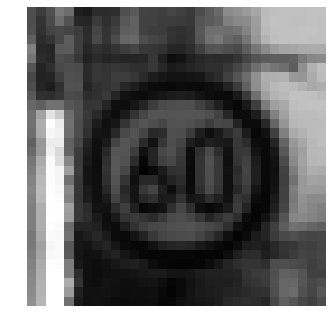

In [21]:
# Initial image
imageToUse = X_train[3680]
plt.imshow(imageToUse.squeeze(), cmap="gray")
plt.axis('off')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


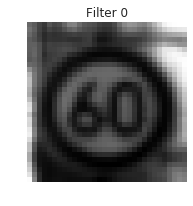

In [22]:
#### Plot h_trans1 layer:
# h_trans1, c1, c1_max, h_trans2, c2, c2_max
new_saver = tf.train.Saver()
with tf.Session() as sess:
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    getActivations(h_trans1, imageToUse[np.newaxis,:,:,:])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


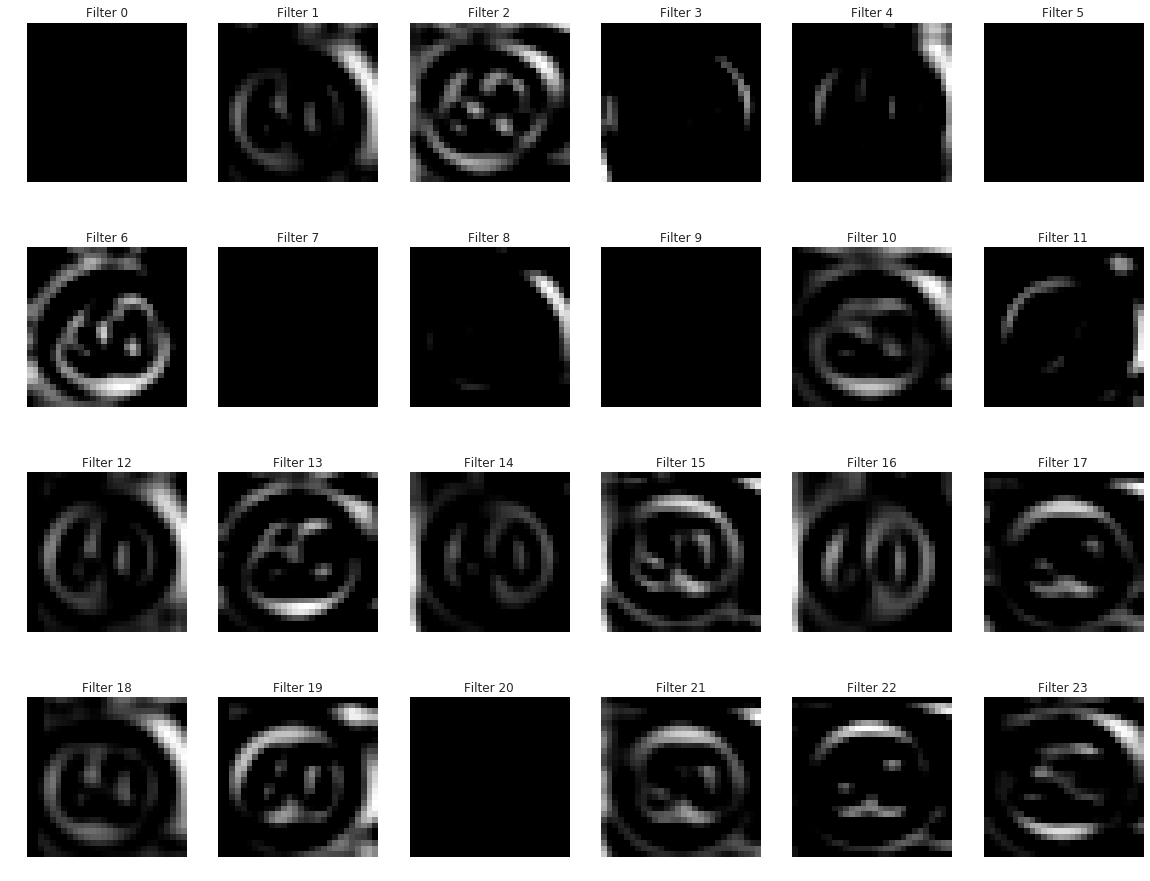

In [23]:
#### Plot c1 layer:
# h_trans1, c1, c1_max, h_trans2, c2, c2_max  (those are not too big for plotting)
new_saver = tf.train.Saver()
with tf.Session() as sess:
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    getActivations(c1, imageToUse[np.newaxis,:,:,:])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


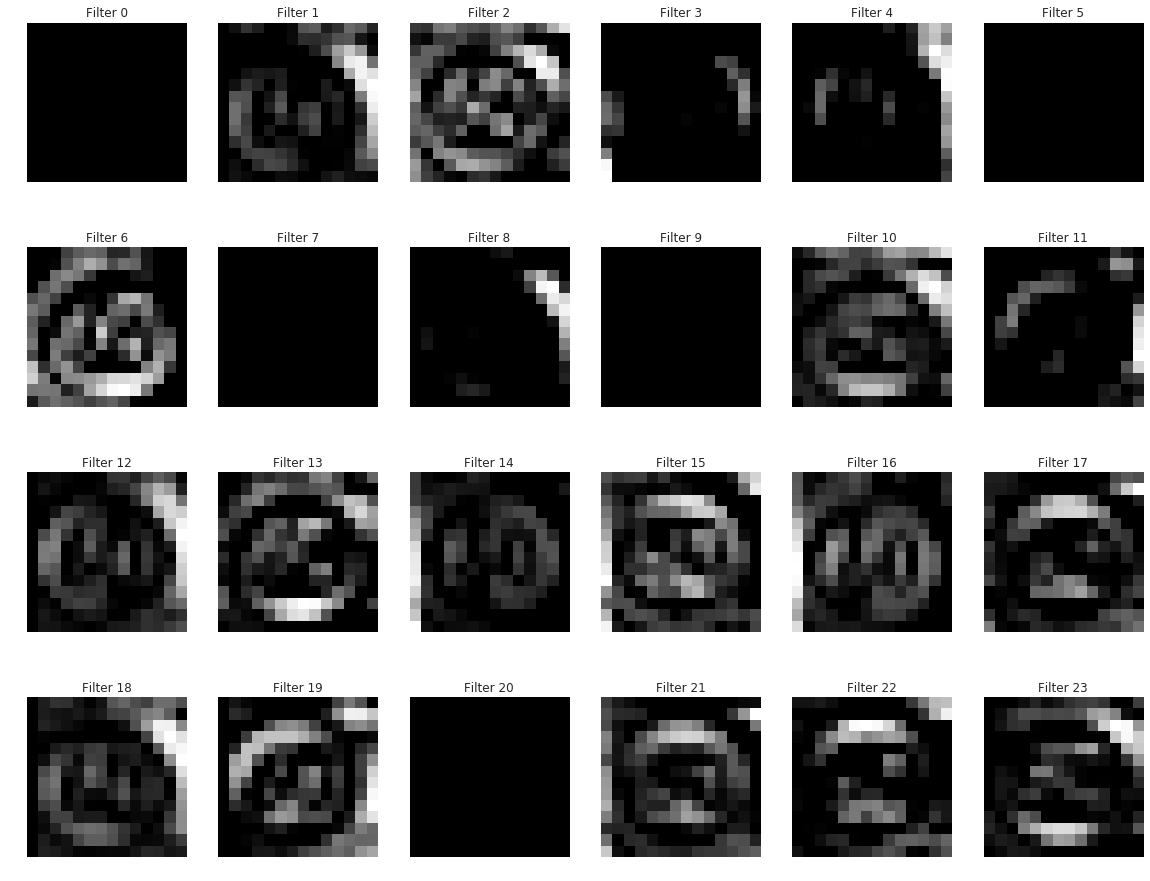

In [24]:
#### Plot c1_max layer:
# h_trans1, c1, c1_max, h_trans2, c2, c2_max  (those are not too big for plotting)
new_saver = tf.train.Saver()
with tf.Session() as sess:
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    getActivations(c1_max, imageToUse[np.newaxis,:,:,:])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


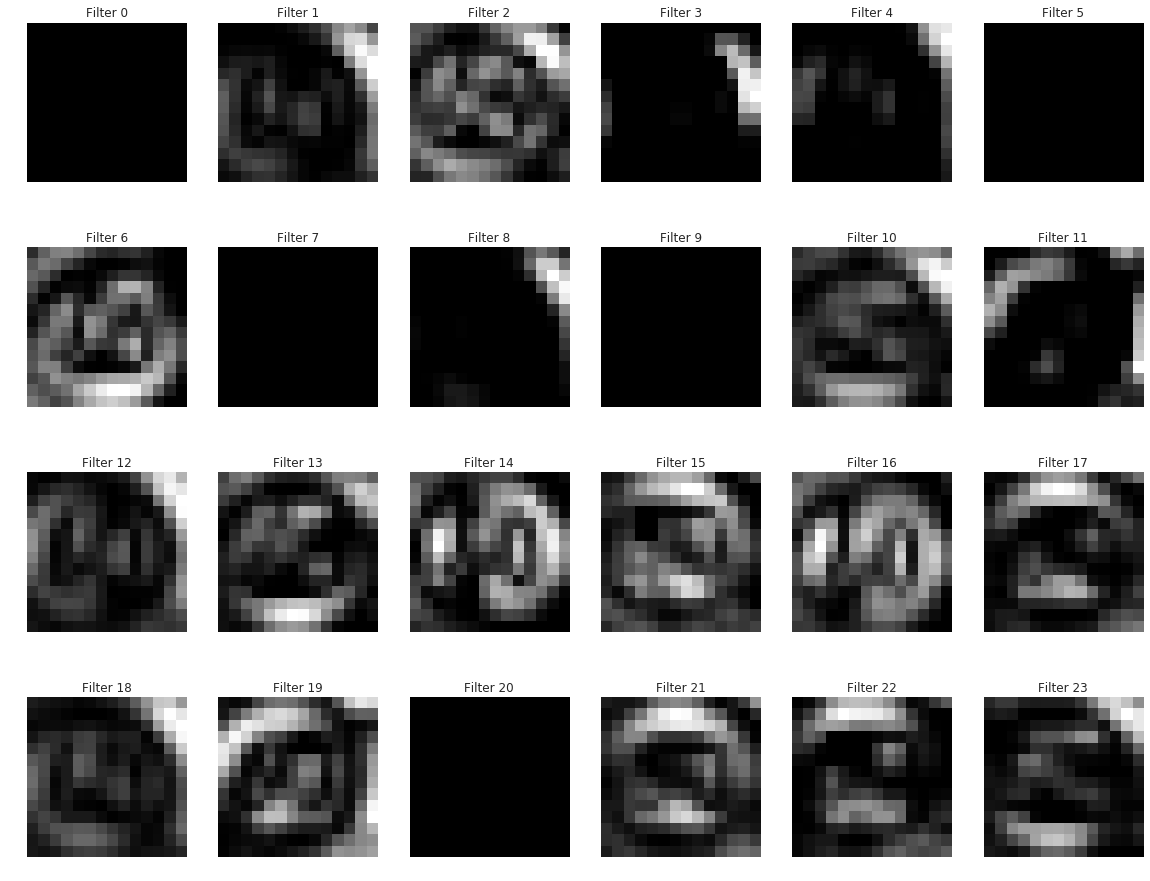

In [25]:
#### Plot h_trans2 layer:
# h_trans1, c1, c1_max, h_trans2, c2, c2_max  (those are not too big for plotting)
new_saver = tf.train.Saver()
with tf.Session() as sess:
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    getActivations(h_trans2, imageToUse[np.newaxis,:,:,:])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


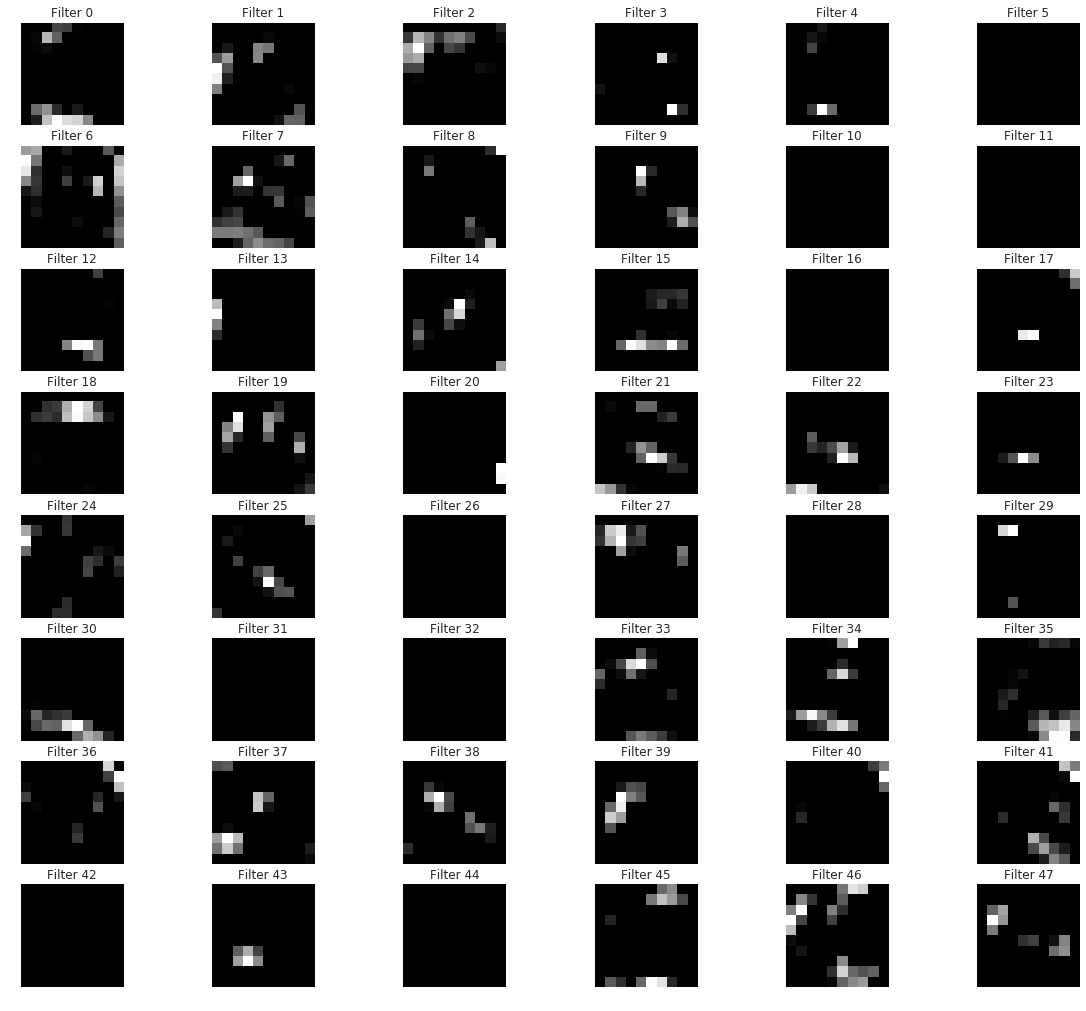

In [26]:
#### Plot c2 layer:
# h_trans1, c1, c1_max, h_trans2, c2, c2_max  (those are not too big for plotting)
new_saver = tf.train.Saver()
with tf.Session() as sess:
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    getActivations(c2, imageToUse[np.newaxis,:,:,:])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


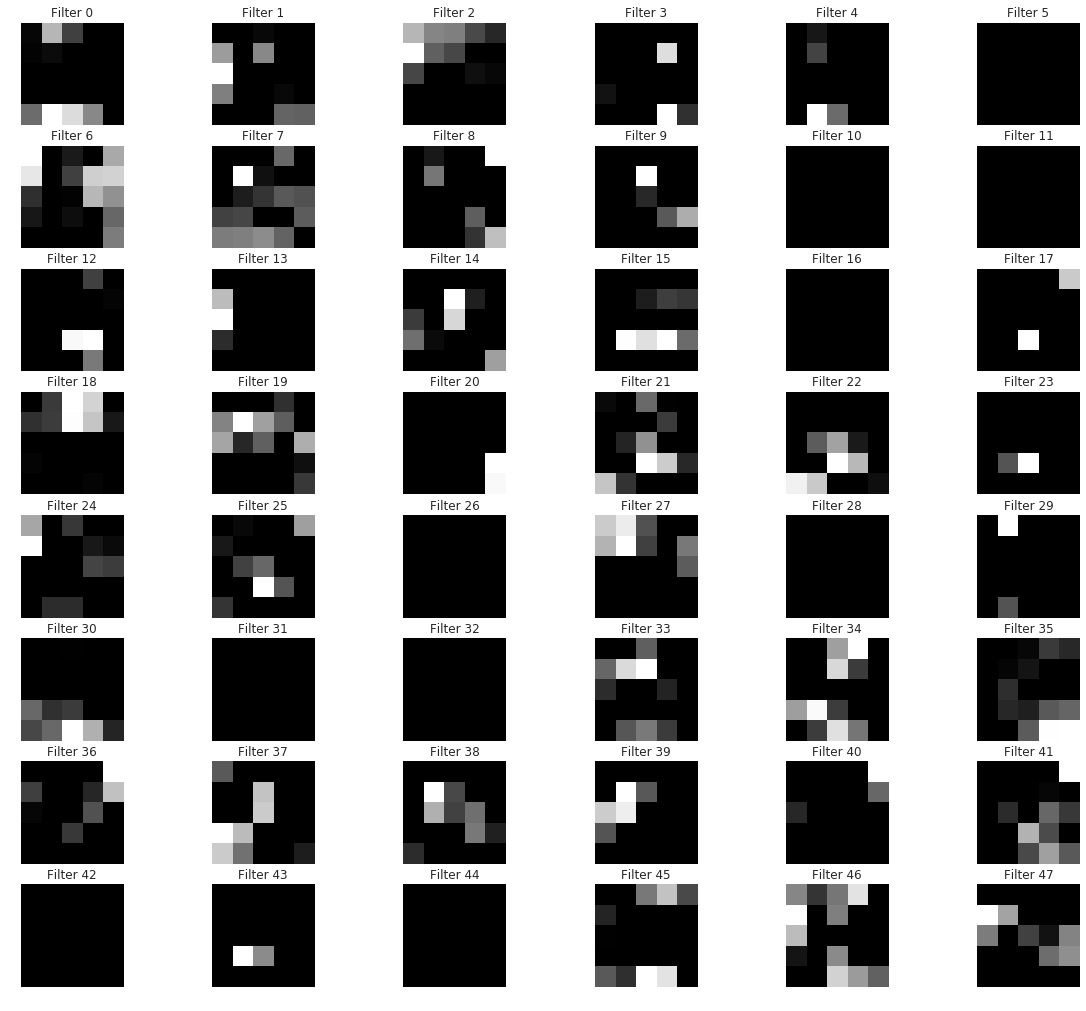

In [27]:
#### Plot c2_max layer:
# h_trans1, c1, c1_max, h_trans2, c2, c2_max  (those are not too big for plotting)
new_saver = tf.train.Saver()
with tf.Session() as sess:
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    getActivations(c2_max, imageToUse[np.newaxis,:,:,:])

In [28]:
# Evaluation of test
predictions = tf.argmax(logits, 1)
actual = tf.argmax(one_hot_y,1)
correct_pred = tf.equal(predictions, actual)
accuracy_oper = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
new_saver = tf.train.Saver()

# Implementation reference:
# https://medium.com/@muddassirahmed/german-traffic-sign-classification-using-deep-learning-219c53fba329#.gjbzs4acj
def evaluate_on_test_data(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()

    # List of indexes and prediction of images gotten wrong by the network
    gotten_wrong_list = []    
    gotten_wrong_index = 0
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_oper, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        pred = sess.run(predictions, feed_dict={x:batch_x, y:batch_y, keep_prob: 1.})
        act = sess.run(actual, feed_dict={y:batch_y})
        
        for a,b in zip(pred,act):
            if(not a == b):
                gotten_wrong_list.append((gotten_wrong_index,a))
            gotten_wrong_index = gotten_wrong_index+1
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples), gotten_wrong_list, pred, act

In [29]:
# Evaluate the final model
with tf.Session() as sess:
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, gotten_wrong_list, pred, act = evaluate_on_test_data(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.965


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


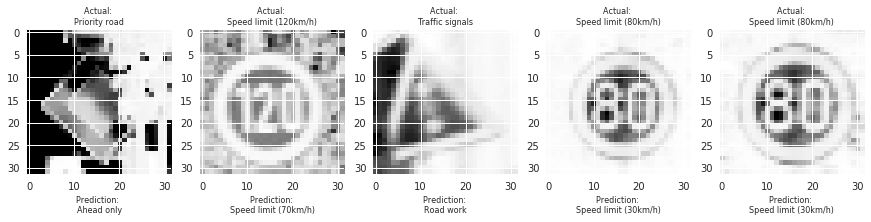

In [30]:
# Implementation reference:
# https://medium.com/@muddassirahmed/german-traffic-sign-classification-using-deep-learning-219c53fba329#.gjbzs4acj


# Load sign names to further evaluate the performance of my network
import csv

sign_names = []
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        sign_names.append(row[1])
    sign_names.reverse()
    sign_names.pop()
    sign_names.reverse()
    
# Plot 5 wrong guess from my model
import matplotlib.patches as patches
import random

num_x = 5
num_y = 1
fig, axarr = plt.subplots(num_y,num_x)
fig.set_size_inches(15,15)
for i in range(num_x*num_y):
    n = random.random()*len(gotten_wrong_list)
    
    image = X_test[gotten_wrong_list[int(n)][0]]
    axarr[i].imshow(image.squeeze())
    
    axarr[i].set_title("Actual: \n"+sign_names[y_test[gotten_wrong_list[int(n)][0]]],fontsize=8)
    axarr[i].set_xlabel("Prediction: \n"+sign_names[gotten_wrong_list[int(n)][1]],fontsize=8)

---

## Step 3: Test a Model on New Images

To get a better insight into how the model is working, I have downloaded six pictures of German traffic signs from the web and used it to predict the traffic sign type.

I am using `signnames.csv`, it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

New Image shape (6, 32, 32, 4)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


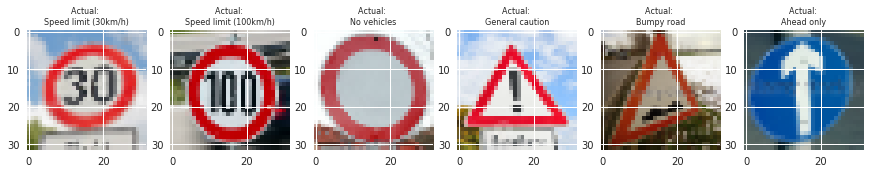

In [31]:
# Load images
from matplotlib.image import imread

new_images_list = [1,7,15,18,22,35]
new_images = []

for i in new_images_list:
    new_images.append(imread("./my_images/"+str(i)+".png",))
new_images = np.array(new_images)
print('New Image shape', new_images.shape)

# Check images 
num_x = 6
num_y = 1
fig, axarr = plt.subplots(num_y,num_x)
fig.set_size_inches(15,15)
for i in range(num_x*num_y):
   
    image = new_images[i]
    axarr[i].imshow(image.squeeze())
    axarr[i].set_title("Actual: \n"+sign_names[new_images_list[i]],fontsize=8)   

### Predict the Sign Type for Each Image

New Images RGB shape: (6, 32, 32, 4)
New Images Greyscale shape: (6, 32, 32, 1)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


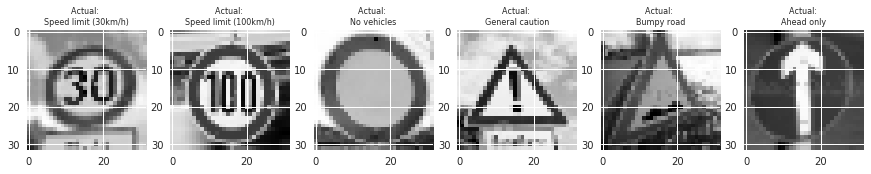

In [32]:
# rgb to grayscale   
import cv2
def grayscale2(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY) #used RGBA here beacause I have alpha channel on those images

def grayscalebatch2(images):
    """
    Convert the whole batch of features images to grayscale and keep depth of 3 channels.
    images = 4D array containing raw pixel data of the images, (num examples, width, height, channels)    
    """
    # Initialize grayscale 4D outputs
    images_gray = np.zeros([len(images),images[0].shape[0], images[0].shape[1], 1]) # to return 1 channels
    
    # Initialize grayscale temporary 3D variables
    gray = np.zeros([len(images),images[0].shape[0], images[0].shape[1]])

    # Loop on each image
    for i in range(len(images)):
        gray[i] = grayscale2(images[i]) 

    # Copy same grayscale image on each of 3 channels
    images_gray[:,:,:,0] = gray # to return 1 channels
    
    
    return images_gray
    
# Convert images to grayscale 4D outputs
new_images_rgb = new_images.copy()
new_images_gray = grayscalebatch2(new_images_rgb)

# Check shapes
print('New Images RGB shape:', new_images_rgb.shape)
print('New Images Greyscale shape:', new_images_gray.shape)

# Check images
num_x = 6
num_y = 1
fig, axarr = plt.subplots(num_y,num_x)
fig.set_size_inches(15,15)
for i in range(num_x*num_y):
   
    image = new_images_gray[i].squeeze()
    axarr[i].imshow(image, cmap='gray')
    axarr[i].set_title("Actual: \n"+sign_names[new_images_list[i]],fontsize=8)

In [33]:
# Evaluate custom images accuracy
with tf.Session() as sess:
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, gotten_wrong_list, pred, act = evaluate_on_test_data(new_images_gray, np.array(new_images_list))
    print("Prediction: ", pred)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Prediction:  [ 1  7 15 18 22 35]
Test Accuracy = 1.000


### Analyze Performance

Test Accuracy = 1.000


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


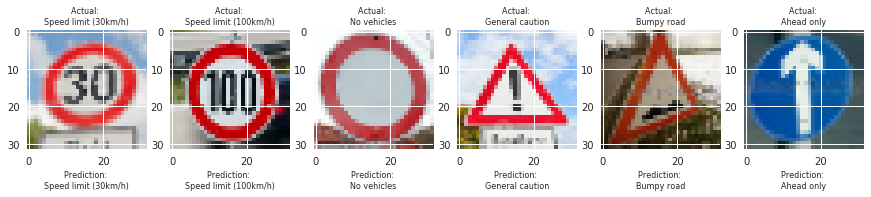

In [34]:
# Plot the images along with their predictions
import matplotlib.patches as patches
import random

print("Test Accuracy = {:.3f}".format(test_accuracy))
num_x = 6
num_y = 1
fig, axarr = plt.subplots(num_y,num_x)
fig.set_size_inches(15,15)
for i in range(num_x*num_y):
    axarr[i].imshow(new_images[i].squeeze())    

    axarr[i].set_title("Actual: \n"+sign_names[act[int(i)]],fontsize=8)
    axarr[i].set_xlabel("Prediction: \n"+sign_names[pred[int(i)]],fontsize=8)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, let's print out the model's softmax probabilities to show the **certainty** of the model's predictions.


In [35]:
# Get logits
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    log = sess.run(logits, feed_dict={x:new_images_gray, y:np.array(new_images_list), keep_prob: 1.})
    #print(log)
    top = sess.run(tf.nn.top_k(tf.constant(log), k=5))
    print(top)


TopKV2(values=array([[ 28.31108856,   0.17697528,  -0.71042824,  -2.89437079,
         -4.86730289],
       [ 46.98156738,  11.85442924,  -3.83625698,  -5.55571127,
        -14.69078732],
       [  8.21374035,   1.56258631,   1.39721096,   0.64889848,
         -0.36921117],
       [ 81.16582489,   2.83711982,  -3.11733651,  -7.97467518,  -9.5865097 ],
       [ 29.69238472,   7.84634829,   5.00397491,   1.28255773,
         -5.87151384],
       [ 40.05910492,   8.94451237,   6.77585316,   2.23998094,  -3.2636323 ]], dtype=float32), indices=array([[ 1, 18,  0,  4, 25],
       [ 7, 40, 11,  1, 12],
       [15,  5,  2, 12,  4],
       [18, 28, 14, 37, 27],
       [22, 26, 29, 31, 23],
       [35, 11, 36, 33, 13]], dtype=int32))


Input image class: 1 which is: Speed limit (30km/h)
Class: 1 is Speed limit (30km/h)
Class: 18 is General caution
Class: 0 is Speed limit (20km/h)
Class: 4 is Speed limit (70km/h)
Class: 25 is Road work


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


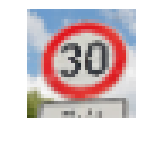

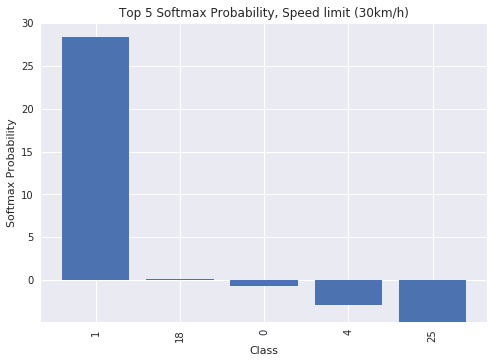

In [36]:
import pandas as pd        

i = 0 # choose 0 to 5 to go through each of the 6 custom images

print('Input image class:', new_images_list[i], 'which is:', sign_names[new_images_list[i]])
fig1, ax1 = plt.subplots( figsize=(2,2))
ax1.imshow(new_images[i].squeeze(), cmap="gray")
ax1.axis('off')

print('Class:', top[1][i][0], 'is', sign_names[top[1][i][0]])
print('Class:', top[1][i][1], 'is', sign_names[top[1][i][1]])
print('Class:', top[1][i][2], 'is', sign_names[top[1][i][2]])
print('Class:', top[1][i][3], 'is', sign_names[top[1][i][3]])
print('Class:', top[1][i][4], 'is', sign_names[top[1][i][4]])


df = pd.DataFrame(top[0][i], index = top[1][i])
ax2 = df.plot(kind='bar', legend = False, width = .8, title='Top 5 Softmax Probability, ' + sign_names[new_images_list[0]])
ax2.set_xlabel("Class")
ax2.set_ylabel("Softmax Probability")


Input image class: 7 which is: Speed limit (100km/h)
Class: 7 is Speed limit (100km/h)
Class: 40 is Roundabout mandatory
Class: 11 is Right-of-way at the next intersection
Class: 1 is Speed limit (30km/h)
Class: 12 is Priority road


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


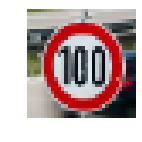

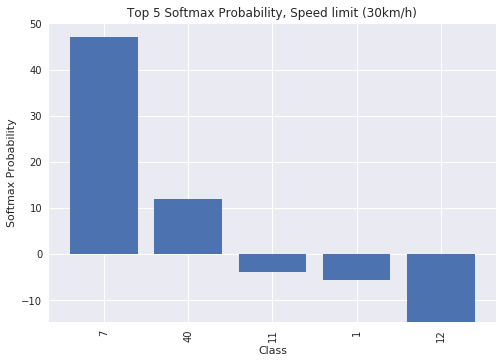

In [37]:
import pandas as pd        

i = 1 # choose 0 to 5 to go through each of the 6 custom images

print('Input image class:', new_images_list[i], 'which is:', sign_names[new_images_list[i]])
fig1, ax1 = plt.subplots( figsize=(2,2))
ax1.imshow(new_images[i].squeeze(), cmap="gray")
ax1.axis('off')

print('Class:', top[1][i][0], 'is', sign_names[top[1][i][0]])
print('Class:', top[1][i][1], 'is', sign_names[top[1][i][1]])
print('Class:', top[1][i][2], 'is', sign_names[top[1][i][2]])
print('Class:', top[1][i][3], 'is', sign_names[top[1][i][3]])
print('Class:', top[1][i][4], 'is', sign_names[top[1][i][4]])


df = pd.DataFrame(top[0][i], index = top[1][i])
ax2 = df.plot(kind='bar', legend = False, width = .8, title='Top 5 Softmax Probability, ' + sign_names[new_images_list[0]])
ax2.set_xlabel("Class")
ax2.set_ylabel("Softmax Probability")

Input image class: 15 which is: No vehicles
Class: 15 is No vehicles
Class: 5 is Speed limit (80km/h)
Class: 2 is Speed limit (50km/h)
Class: 12 is Priority road
Class: 4 is Speed limit (70km/h)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


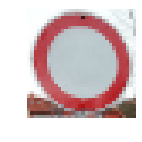

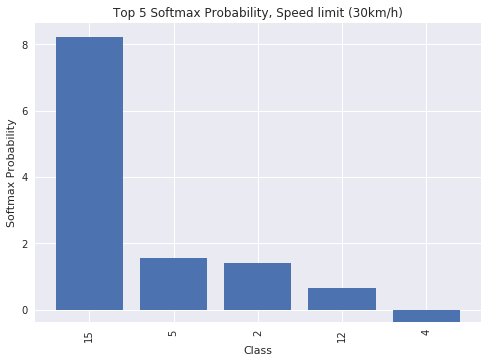

In [38]:
import pandas as pd        

i = 2 # choose 0 to 5 to go through each of the 6 custom images

print('Input image class:', new_images_list[i], 'which is:', sign_names[new_images_list[i]])
fig1, ax1 = plt.subplots( figsize=(2,2))
ax1.imshow(new_images[i].squeeze(), cmap="gray")
ax1.axis('off')

print('Class:', top[1][i][0], 'is', sign_names[top[1][i][0]])
print('Class:', top[1][i][1], 'is', sign_names[top[1][i][1]])
print('Class:', top[1][i][2], 'is', sign_names[top[1][i][2]])
print('Class:', top[1][i][3], 'is', sign_names[top[1][i][3]])
print('Class:', top[1][i][4], 'is', sign_names[top[1][i][4]])


df = pd.DataFrame(top[0][i], index = top[1][i])
ax2 = df.plot(kind='bar', legend = False, width = .8, title='Top 5 Softmax Probability, ' + sign_names[new_images_list[0]])
ax2.set_xlabel("Class")
ax2.set_ylabel("Softmax Probability")

Input image class: 18 which is: General caution
Class: 18 is General caution
Class: 28 is Children crossing
Class: 14 is Stop
Class: 37 is Go straight or left
Class: 27 is Pedestrians


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


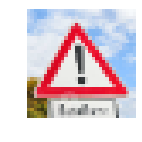

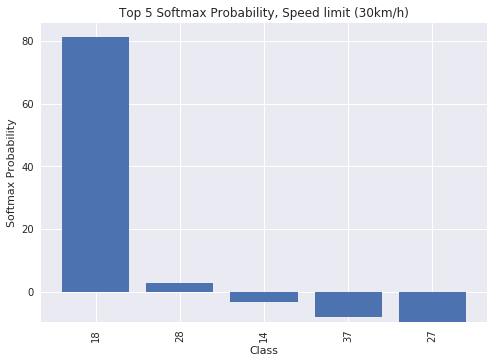

In [39]:
import pandas as pd        

i = 3 # choose 0 to 5 to go through each of the 6 custom images

print('Input image class:', new_images_list[i], 'which is:', sign_names[new_images_list[i]])
fig1, ax1 = plt.subplots( figsize=(2,2))
ax1.imshow(new_images[i].squeeze(), cmap="gray")
ax1.axis('off')

print('Class:', top[1][i][0], 'is', sign_names[top[1][i][0]])
print('Class:', top[1][i][1], 'is', sign_names[top[1][i][1]])
print('Class:', top[1][i][2], 'is', sign_names[top[1][i][2]])
print('Class:', top[1][i][3], 'is', sign_names[top[1][i][3]])
print('Class:', top[1][i][4], 'is', sign_names[top[1][i][4]])


df = pd.DataFrame(top[0][i], index = top[1][i])
ax2 = df.plot(kind='bar', legend = False, width = .8, title='Top 5 Softmax Probability, ' + sign_names[new_images_list[0]])
ax2.set_xlabel("Class")
ax2.set_ylabel("Softmax Probability")

Input image class: 22 which is: Bumpy road
Class: 22 is Bumpy road
Class: 26 is Traffic signals
Class: 29 is Bicycles crossing
Class: 31 is Wild animals crossing
Class: 23 is Slippery road


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


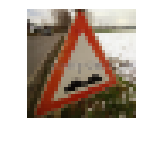

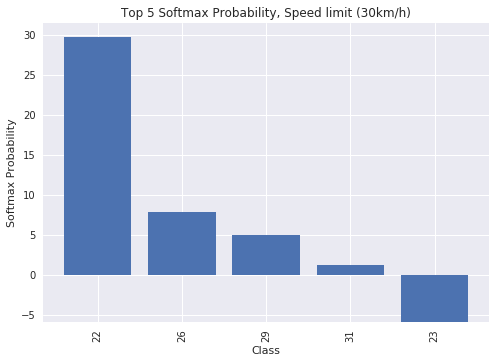

In [40]:
import pandas as pd        

i = 4 # choose 0 to 5 to go through each of the 6 custom images

print('Input image class:', new_images_list[i], 'which is:', sign_names[new_images_list[i]])
fig1, ax1 = plt.subplots( figsize=(2,2))
ax1.imshow(new_images[i].squeeze(), cmap="gray")
ax1.axis('off')

print('Class:', top[1][i][0], 'is', sign_names[top[1][i][0]])
print('Class:', top[1][i][1], 'is', sign_names[top[1][i][1]])
print('Class:', top[1][i][2], 'is', sign_names[top[1][i][2]])
print('Class:', top[1][i][3], 'is', sign_names[top[1][i][3]])
print('Class:', top[1][i][4], 'is', sign_names[top[1][i][4]])


df = pd.DataFrame(top[0][i], index = top[1][i])
ax2 = df.plot(kind='bar', legend = False, width = .8, title='Top 5 Softmax Probability, ' + sign_names[new_images_list[0]])
ax2.set_xlabel("Class")
ax2.set_ylabel("Softmax Probability")

Input image class: 35 which is: Ahead only
Class: 35 is Ahead only
Class: 11 is Right-of-way at the next intersection
Class: 36 is Go straight or right
Class: 33 is Turn right ahead
Class: 13 is Yield


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


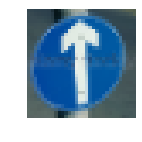

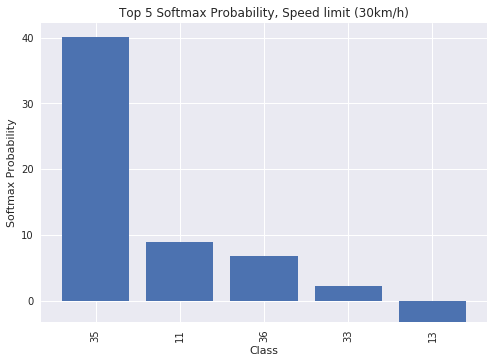

In [41]:
import pandas as pd        

i = 5 # choose 0 to 5 to go through each of the 6 custom images

print('Input image class:', new_images_list[i], 'which is:', sign_names[new_images_list[i]])
fig1, ax1 = plt.subplots( figsize=(2,2))
ax1.imshow(new_images[i].squeeze(), cmap="gray")
ax1.axis('off')

print('Class:', top[1][i][0], 'is', sign_names[top[1][i][0]])
print('Class:', top[1][i][1], 'is', sign_names[top[1][i][1]])
print('Class:', top[1][i][2], 'is', sign_names[top[1][i][2]])
print('Class:', top[1][i][3], 'is', sign_names[top[1][i][3]])
print('Class:', top[1][i][4], 'is', sign_names[top[1][i][4]])


df = pd.DataFrame(top[0][i], index = top[1][i])
ax2 = df.plot(kind='bar', legend = False, width = .8, title='Top 5 Softmax Probability, ' + sign_names[new_images_list[0]])
ax2.set_xlabel("Class")
ax2.set_ylabel("Softmax Probability")